<img style="float: left;;" src='Figures/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Discretización por Kmeans


## Introducción


K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

**¿Cómo funciona?**

El algoritmo trabaja iterativamente para asignar a cada “muestra” uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


> Los `“centroids”` de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos qu>e se utilizarán para poder etiquetar nuevas muestras.

> `Etiquetas` para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Algoritmo K-means

El algoritmo utiliza una proceso **iterativo** en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el `conjunto de datos` y un valor de `K`. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroids serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

> 1.- **Paso de asignación** $argmin_{c_i \in C} dist(c_i, x)^2$

> 2.- **Paso de actualización del Centroide**  En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior. $c_i = \frac{1}{|s_i|}\sum_{x_i \in s_i} x_i$

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  si no hay cambios en los puntos asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [3]:
class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # lista de indices por cada cluster
        self.clusters = [[] for _ in range(self.K)]

        # centroides de cada cluster 
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Inicialización
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimizando los clusters
        for _ in range(self.max_iters):
            # asignación de cada punto al centroide más cercano
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculo de los nuevos centroides desde los clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Clasificación de los samples como indices en sus clusters 
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # cada sample obtendrá una etiqueta del cluster al que le corresponde
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # Asignación de los samples a el centroide más cercano
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distancia del punto actual con cada centroide
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # asignación de la media de los centroides de cada cluster
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distancias entre el viejo y nuevos centroides, para todos los centroide
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


(500, 2)
3


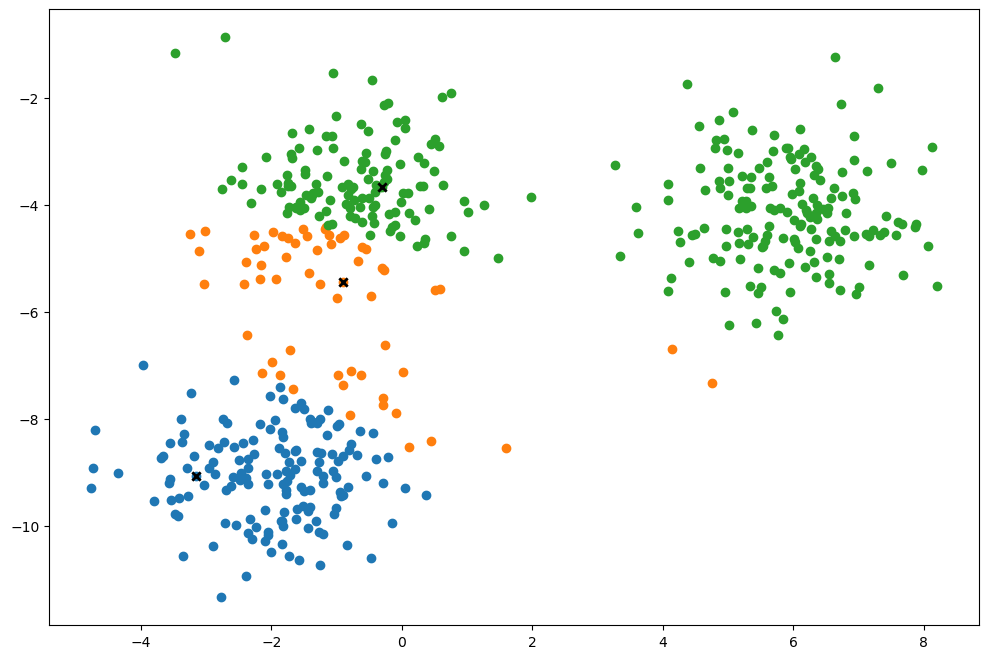

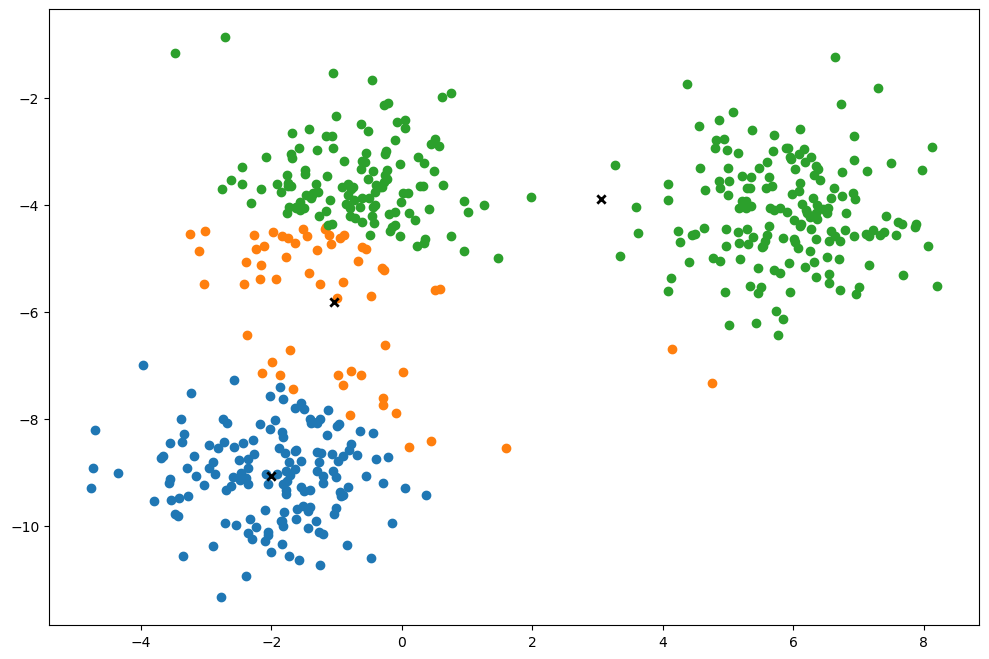

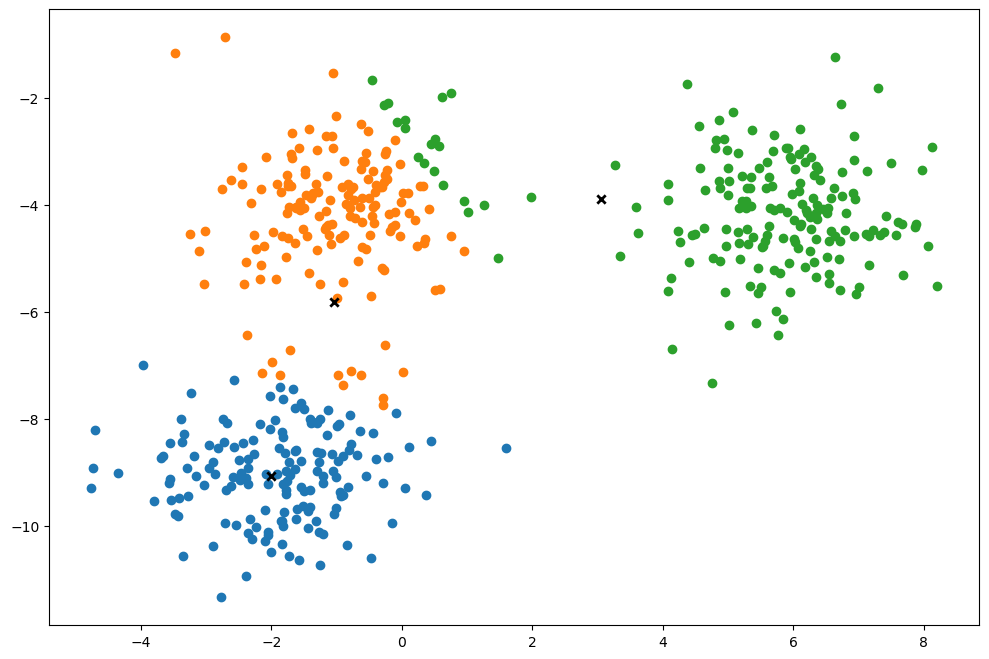

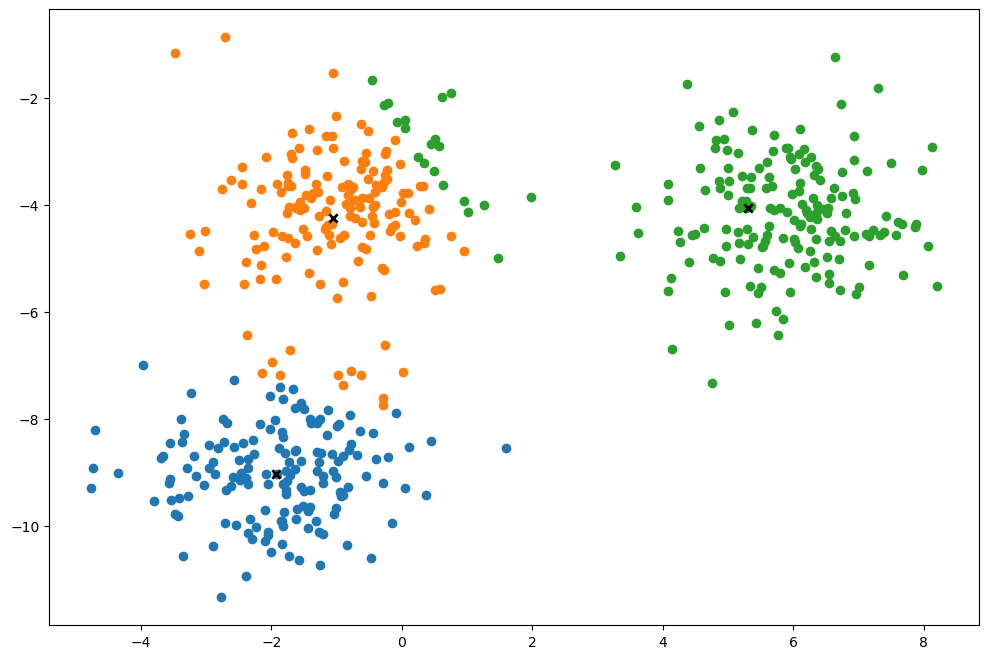

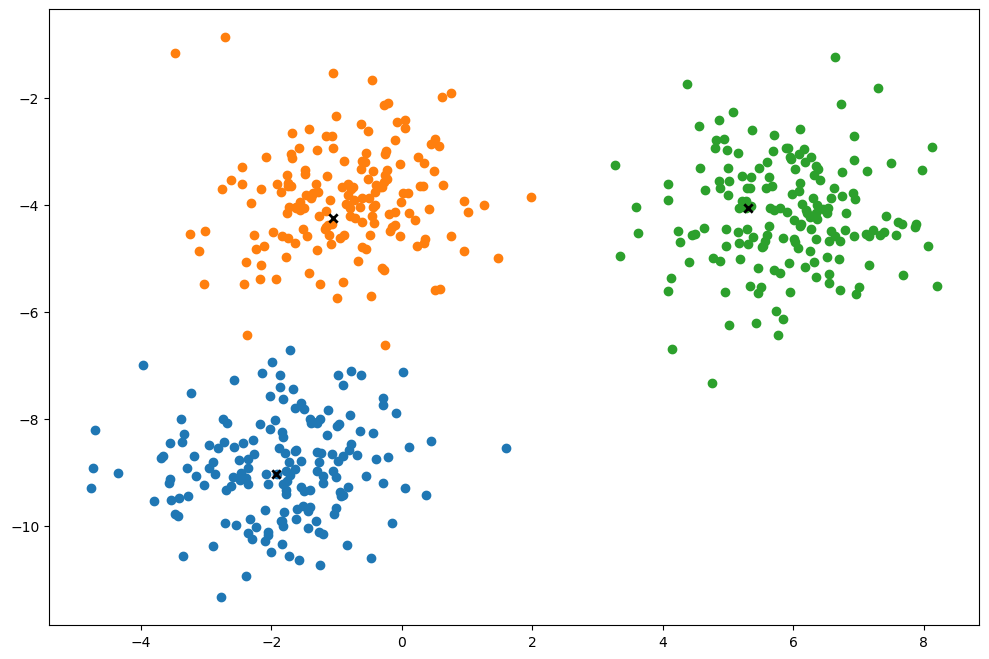

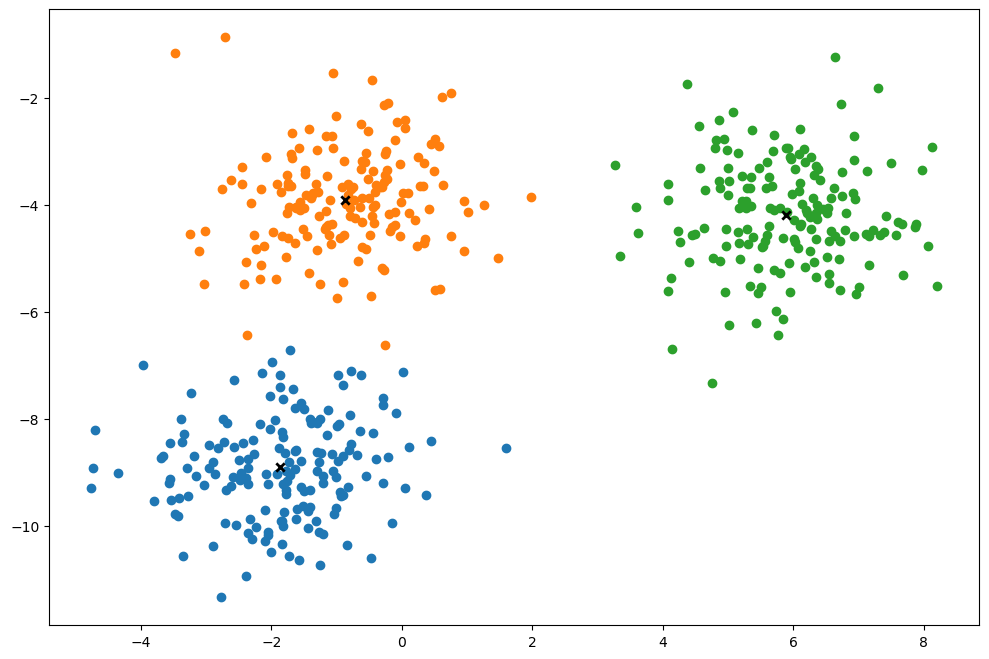

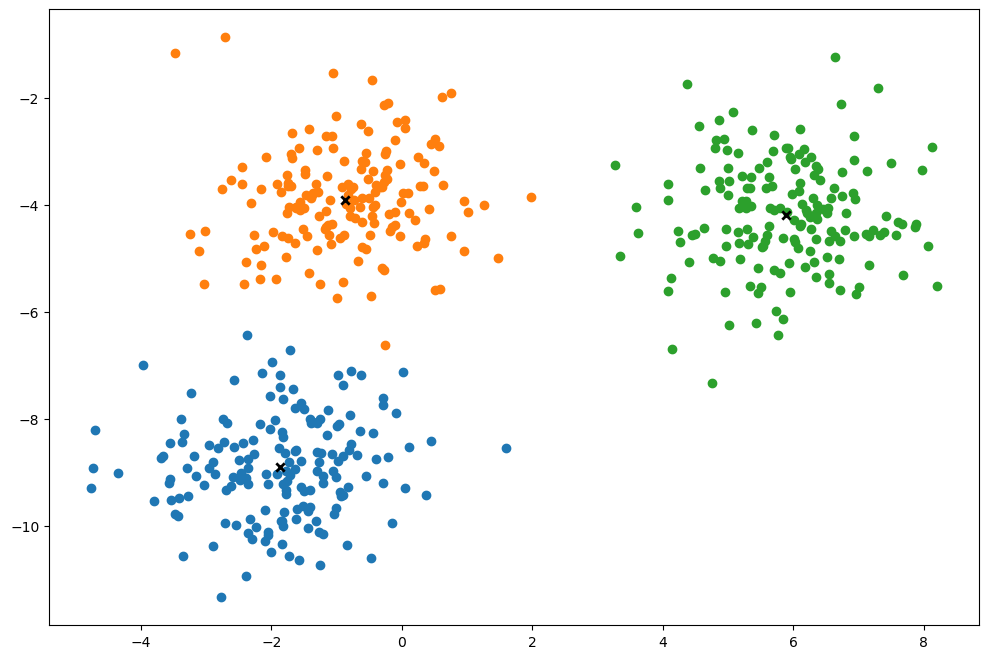

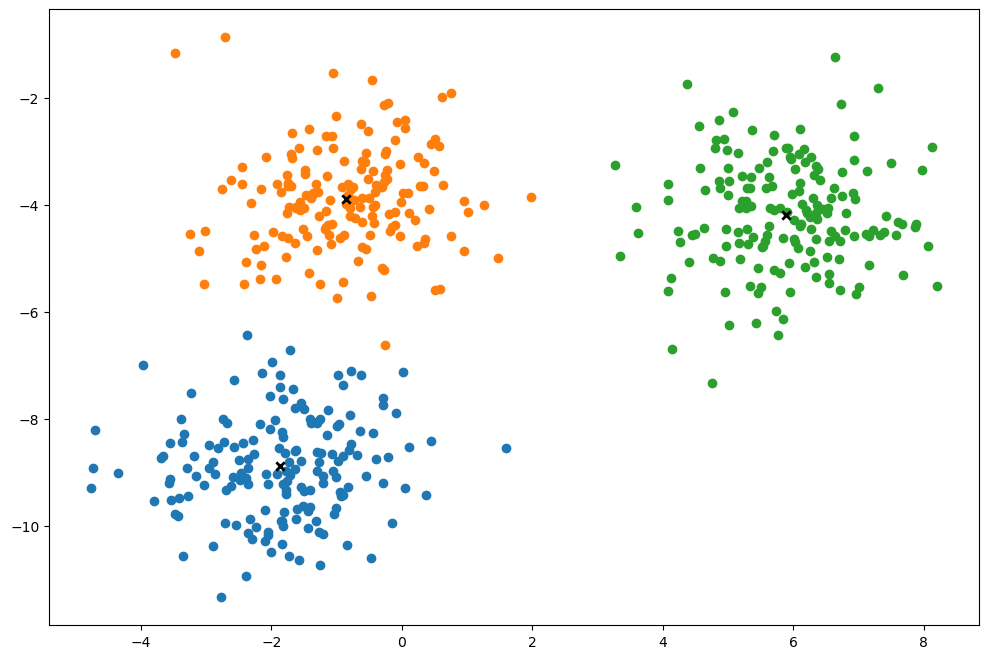

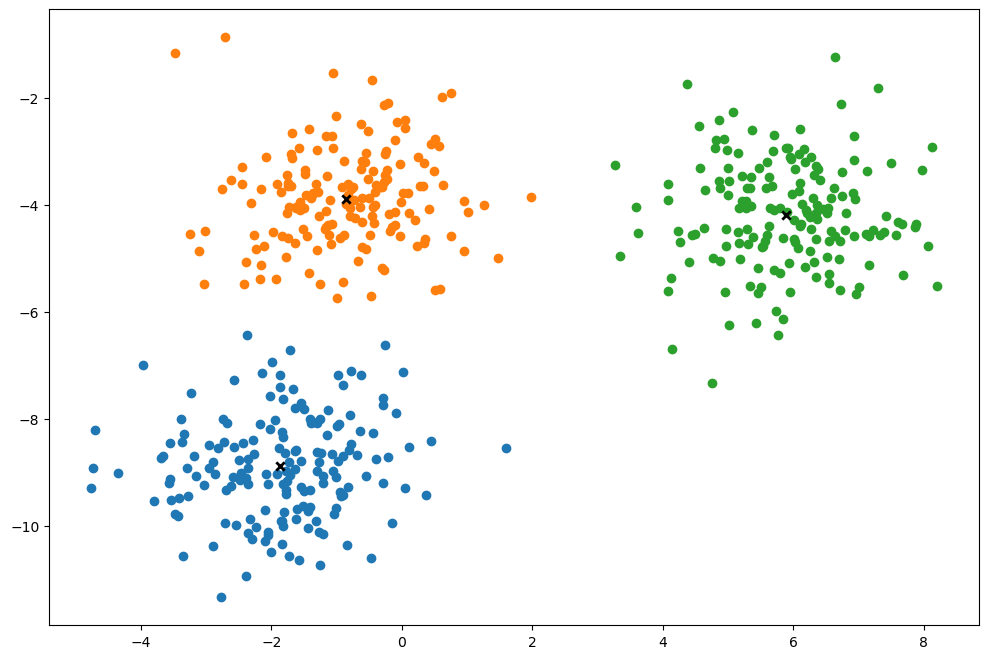

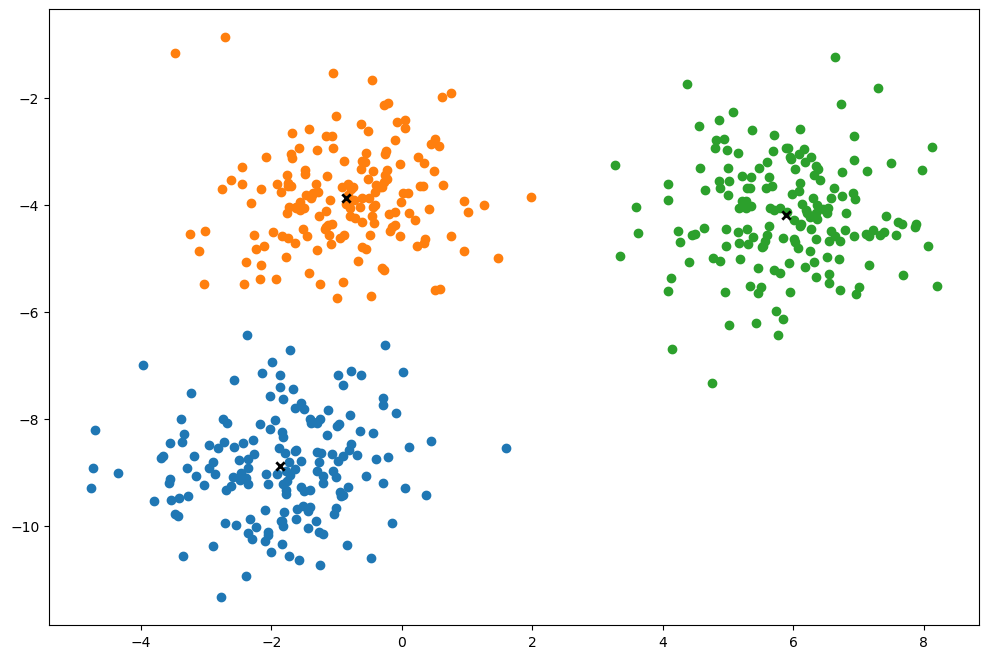

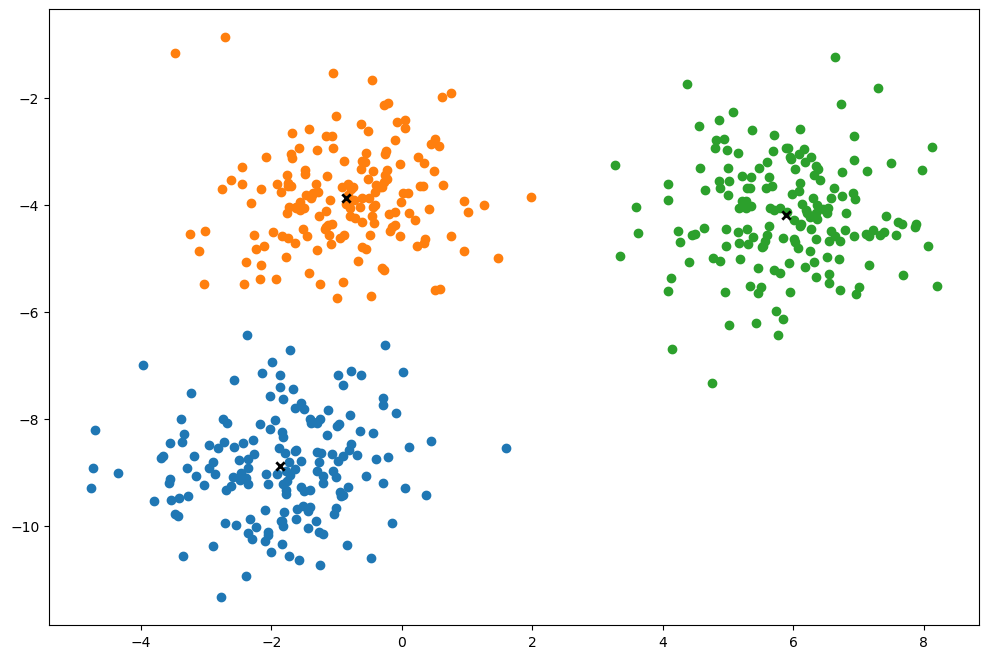

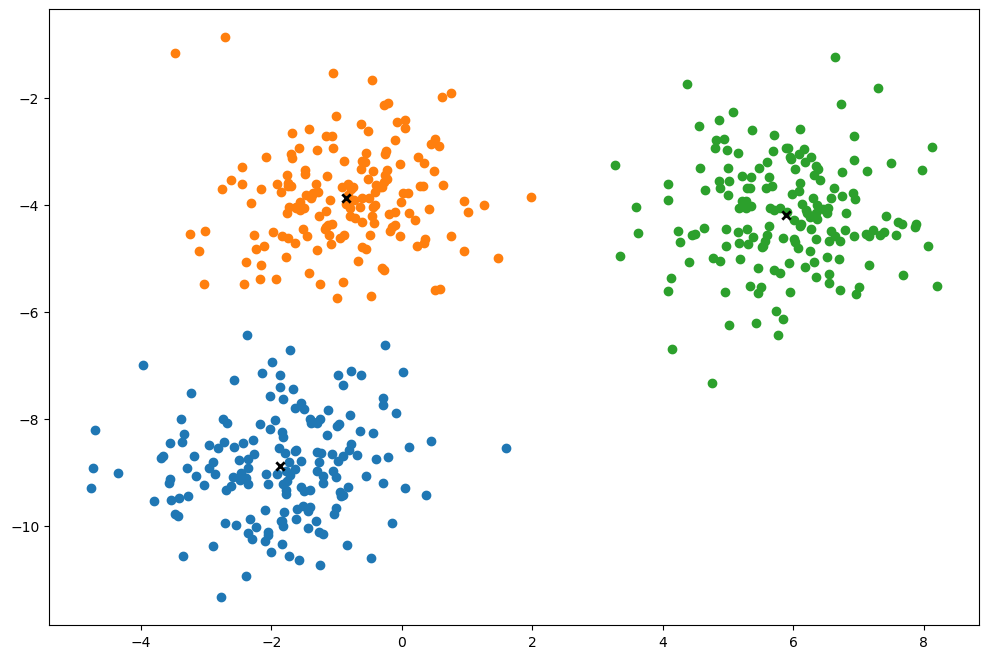

In [4]:
np.random.seed(42)
from sklearn.datasets import make_blobs

X, y = make_blobs(
    centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()

## Criterios de Elección de Grupos

> Criterio del codo

> Criterio del gradiente

## Ejemplo 1

In [5]:
#%% Generar datos aleatorios
X, Y = make_blobs(n_samples=1500, random_state=5)

In [6]:
X

array([[-4.4207936 ,  7.90908652],
       [-5.6742539 ,  8.24798888],
       [ 0.15096735,  3.72731887],
       ...,
       [-6.15312156,  7.33253057],
       [-6.20649316,  7.96321396],
       [ 0.8546093 ,  1.95771111]])

In [7]:
Y

array([0, 1, 2, ..., 0, 0, 2])

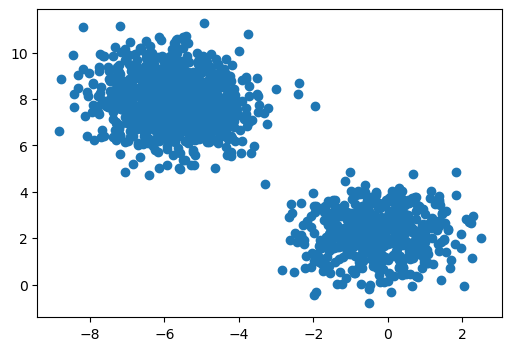

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
from sklearn.cluster import KMeans
#%% Aplicar el algoritmo Kmeans
model = KMeans(n_clusters=10, random_state=5, init='random')
model = model.fit(X)
grupos = model.predict(X)
centroides = model.cluster_centers_

In [10]:
grupos

array([2, 7, 5, ..., 0, 6, 9])

In [11]:
centroides

array([[-6.41363769,  6.87199718],
       [-5.06796321,  6.20397767],
       [-4.7508444 ,  7.5393831 ],
       [-6.34192261,  9.68765883],
       [ 0.05312665,  1.1799101 ],
       [-0.61047028,  3.18710267],
       [-6.87548654,  8.13665271],
       [-5.23064872,  8.71360075],
       [-1.52494171,  1.77672127],
       [ 0.82017731,  2.62093495]])

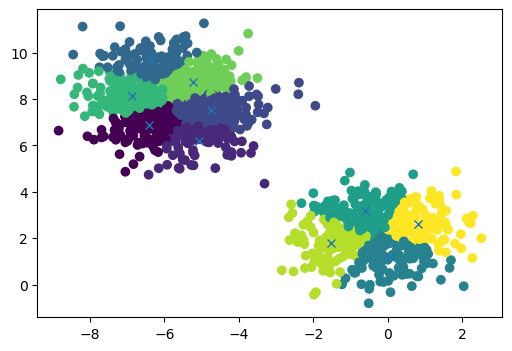

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=grupos)
plt.plot(centroides[:,0], centroides[:,1], 'x')
plt.show()

In [13]:
model.inertia_

922.1423977731395

Text(0, 0.5, 'Inercias')

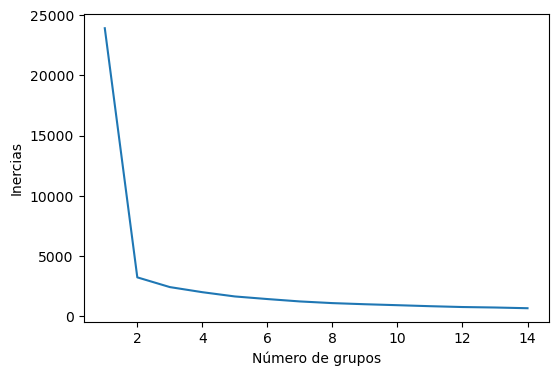

In [14]:
#%% Criterio de selección del codo
ngroup = 15
inercias = np.zeros(ngroup)

for k in np.arange(1,ngroup):
    model = KMeans(n_clusters = k, random_state=5, init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_
    
plt.figure(figsize=(6,4))
plt.plot(np.arange(1,ngroup), inercias[1:])
plt.xlabel('Número de grupos')
plt.ylabel('Inercias')
    

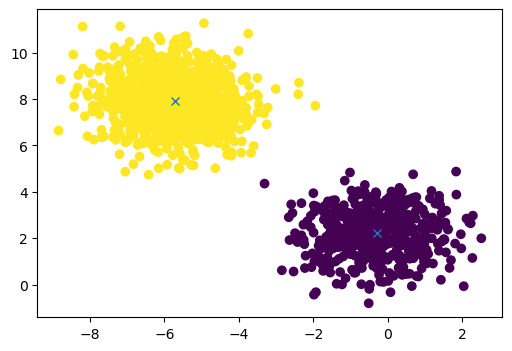

In [15]:
#%% Definiendo el número de grupos optimos
#%% Aplicar el algoritmo Kmeans con 2 grupos
model = KMeans(n_clusters=2, random_state=5, init='random')
model = model.fit(X)
grupos = model.predict(X)
centroides = model.cluster_centers_

plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=grupos)
plt.plot(centroides[:,0], centroides[:,1], 'x')
plt.show()

In [16]:
# Función del criterio de selección de grupos (criterio del codo)
def criterio_codo_kmeans(ngroup, data):
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters = k, random_state=5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_
        
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup), inercias[1:])
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercias')
    
    

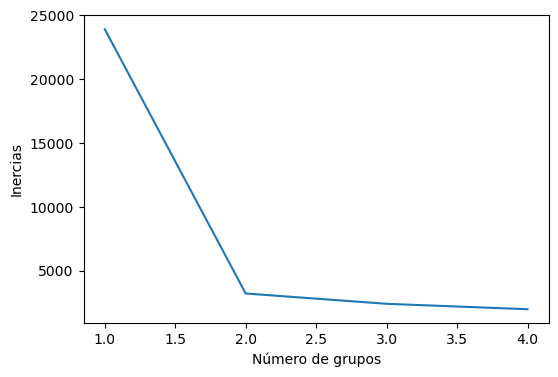

In [17]:
criterio_codo_kmeans(5,X)

In [19]:
# Función del criterio de selección de grupos (criterio del gradiente)
def criterio_gradiente_kmeans(ngroup, data):
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters = k, random_state=5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_
    
    #Derivar las inercias y graficar el gradiente
    gradiente =  np.diff(inercias)
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup), gradiente)
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercias')
    

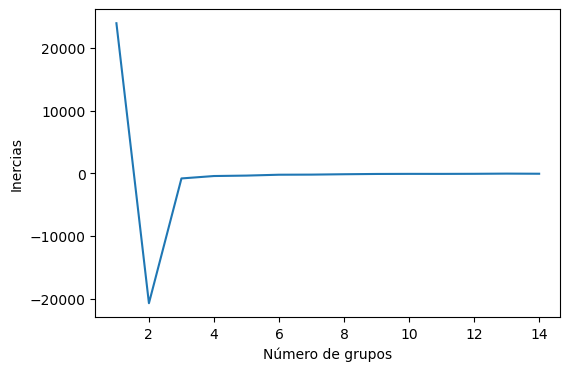

In [20]:
criterio_gradiente_kmeans(15,X)

### Discretización

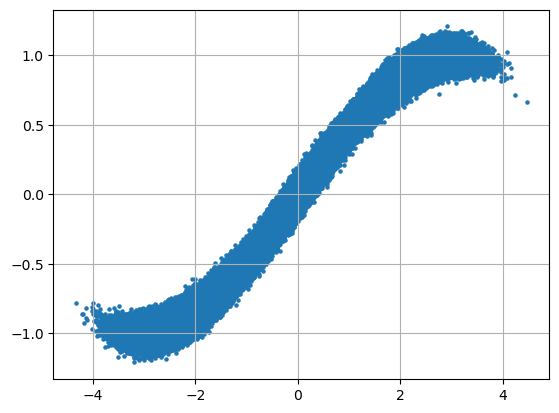

In [21]:
from sklearn.linear_model import LinearRegression

df=pd.read_csv('dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

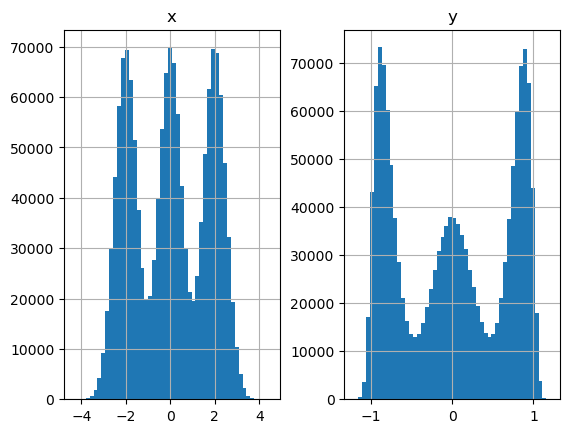

In [22]:
df.hist(bins=50)

<Axes: >

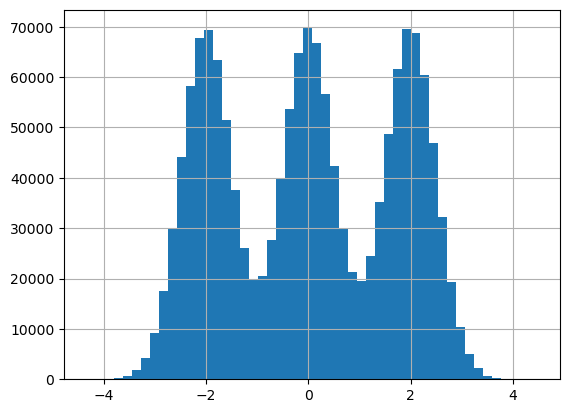

In [23]:
df.x.hist(bins=50)

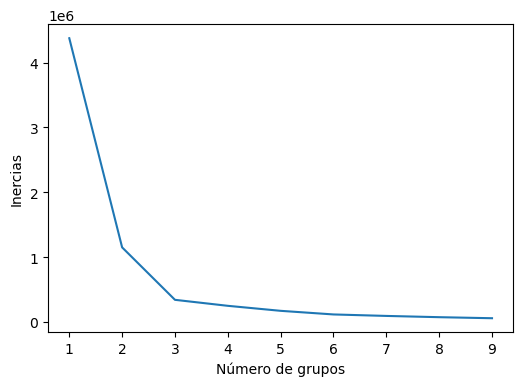

In [24]:
criterio_codo_kmeans(ngroup=10, data=df[['x']])

In [25]:
# Centroides
k=3
ctr=np.random.uniform(df.x.min(),df.x.max(),k)
ctr

array([3.89016358, 0.08057244, 0.41834222])

In [26]:
#Algoritmo Kmeans básico
dif=[]
for c_i in ctr:
    dif.append(np.abs(c_i-df[['x']].values))
distancias=np.concatenate(dif,axis=1)
grupos=np.argmin(distancias,axis=1)
df_copia=df.copy()
df_copia['kmeans']=grupos
df_copia.groupby('kmeans')['x'].mean()

kmeans
0    2.501808
1   -1.287502
2    1.320308
Name: x, dtype: float64

In [27]:
df_copia

,x,y,kmeans
0,-1.905967,-0.780757,1
1,-2.934568,-0.955310,1
2,-2.178603,-0.960997,1
3,-1.870977,-0.791746,1
4,-2.513686,-0.968655,1
...,...,...,...
1499995,1.983445,0.874526,2
1499996,1.251872,0.576522,2
1499997,2.066690,0.796106,2
1499998,2.224125,0.936015,0


In [28]:
df_copia['kmeans'].value_counts()

kmeans
1    845135
2    465450
0    189415
Name: count, dtype: int64

array([ 2.00995408e+00, -2.01017736e+00,  7.44339211e-04])

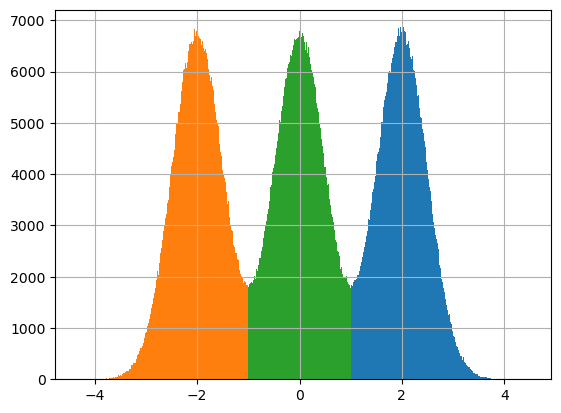

In [29]:
ctr_anterior=np.ones(k)*np.inf
eps=1e-6
while(np.abs(ctr-ctr_anterior).sum()>eps): # Minkowski con p=1, criterio de paro
    dif=[]
    for c_i in ctr:
        dif.append(np.abs(c_i-df[['x']].values))
    distancias=np.concatenate(dif,axis=1)
    grupos=np.argmin(distancias,axis=1)
    df_copia=df.copy()
    df_copia['kmeans']=grupos
    ctr_anterior=ctr.copy()
    ctr=df_copia.groupby('kmeans')['x'].mean().values
df['kmeans']=grupos
df.groupby('kmeans')['x'].hist(bins='auto')
ctr

#### Regresión lineal de los datos discretizados

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


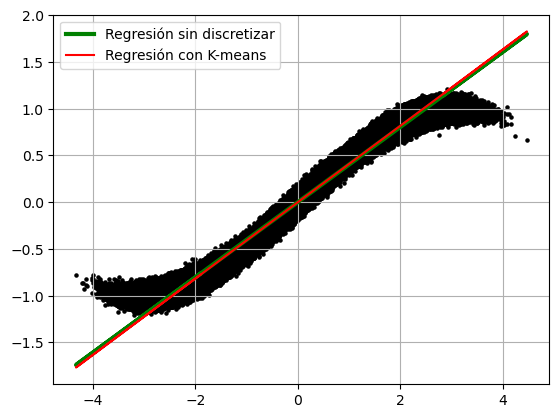

In [30]:
# Modelo con datos sin discretizar
lin_SD=LinearRegression()
lin_SD.fit(df[['x']],df['y'])
predict_SD=lin_SD.predict(df[['x']])

# Modelo con datos discretizados con K-means
lin_kmeans=LinearRegression()
x=ctr.reshape(-1,1)
y=df.groupby('kmeans')['y'].mean()
lin_kmeans.fit(x,y)
predict_kmeans=lin_kmeans.predict(df[['x']].values)

# Gráfica
plt.scatter(df.x,df.y,s=5,c='k')
plt.plot(df.x,predict_SD,'g',label='Regresión sin discretizar',lw=3)
plt.plot(df.x,predict_kmeans,'r',label='Regresión con K-means')
plt.legend()
plt.grid()

In [31]:
# Modelo con datos sin discretizar
lin_SD.coef_,lin_SD.intercept_

(array([0.40165508]), 0.0001864860861957386)

In [32]:
# Modelo con datos discretizados usando K-means
lin_kmeans.coef_,lin_kmeans.intercept_

(array([0.40786998]), 0.0001852183640434627)

In [33]:
lin_SD.score(df[['x']],df['y']),lin_kmeans.score(df[['x']].values,df['y'])

(0.9846959828987776, 0.9844602258933561)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


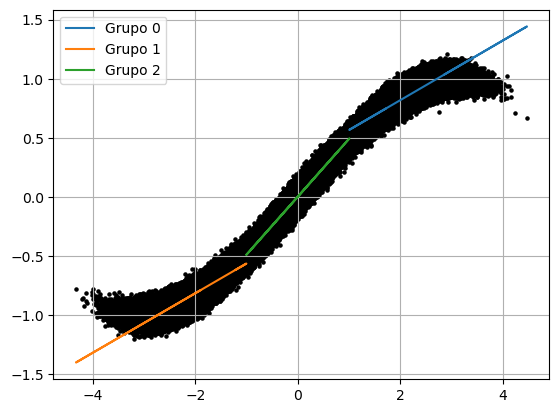

In [34]:
plt.scatter(df.x,df.y,c='k',s=5)
lin_centroides=[]
for c_i in range(k):
    x=df[df['kmeans']==c_i][['x']]
    y=df[df['kmeans']==c_i]['y']
    lin_centroides.append(LinearRegression())
    lin_centroides[-1].fit(x,y)

    plt.plot(x,lin_centroides[-1].predict(x),label='Grupo '+str(c_i))
plt.legend()
plt.grid()